In [1]:
import numpy
import scipy
import netCDF4
import matplotlib.pyplot as mp
import matplotlib.ticker
import matplotlib.colors
import scipy.stats
import pandas
import itertools

import mpl_toolkits
from mpl_toolkits import basemap

mp.rcParams.update({'mathtext.default': 'regular'})
% matplotlib inline

In [2]:
working_dir = '/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/'
#save_dir = '/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/calculations/npy_files/'
#latlon_indices = numpy.load(working_dir + 'ccal_latlon_indices_array.npy'); region='ccal'
#latlon_indices = numpy.load(working_dir + 'ncal_latlon_indices_array.npy'); region='ncal'
#latlon_indices = numpy.load(working_dir + 'scal_latlon_indices_array.npy'); region='scal'

PRECT_lat = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/PRECT_lat.npy')
PRECT_lon = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/PRECT_lon.npy')

In [3]:
working_dir = '/Users/baird/google_drive/_data_original/NCAR_LENS/daily/PRECT/calculated_npy_files/'
#threshold=0.0
threshold=0.1
#threshold=0.5
#threshold=1.0
#threshold=5.0
#threshold=10.0

In [4]:
# make color map
minval=0.0 # 
maxval=0.95 #
n=256
full_cmap = mp.get_cmap('RdBu')
cmap_partial = matplotlib.colors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=full_cmap.name, a=minval, b=maxval), full_cmap(numpy.linspace(minval, maxval, n)))

In [5]:
PRECT_nlat = 26
PRECT_nlon = 25

latlon_indices = list(itertools.product(range(PRECT_nlat), range(PRECT_nlon)))
region = 'whole_domain'
window=1

In [6]:
extreme_values_100yr = pandas.read_csv('csv_files/extreme_values_seasonal_events_dataframe_pic.csv')
extreme_values_100yr_data = extreme_values_100yr.values[:,1:]
# each row is a latlon value
# each column is a different season
# for each row, find the 95th percentile across all seasons
# plot them as histograms first

In [7]:
#bins = numpy.linspace(sum_100yr_array.min(), sum_100yr_array.max(), 500)
latlon_idx = 647

bins = numpy.linspace(extreme_values_100yr_data[latlon_idx,:].min(), extreme_values_100yr_data[latlon_idx,:].max(), 50)
#hist_count, bin_edges = numpy.histogram(extreme_values_100yr[latlon_idx,:], bins=bins, density=False)
hist, bin_edges = numpy.histogram(extreme_values_100yr_data[latlon_idx,:], bins=bins, density=True)
bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
bin_width = numpy.diff(bin_edges)

(650, 1798)
[ 183.44675247  661.66076867  218.34179303 ...,  117.17006639  340.37973329
  377.09642196]


(array([  7.32215910e-05,   2.92886364e-04,   5.36958334e-04,
          9.03066289e-04,   1.65968940e-03,   2.24546212e-03,
          2.46512690e-03,   2.95327084e-03,   2.09901894e-03,
          2.97767803e-03,   2.66038447e-03,   2.07461174e-03,
          2.29427652e-03,   2.14783334e-03,   1.90376137e-03,
          1.73291099e-03,   1.65968940e-03,   1.44002462e-03,
          1.31798864e-03,   1.07391667e-03,   1.36680303e-03,
          1.17154546e-03,   7.81030304e-04,   9.51880683e-04,
          5.85772728e-04,   5.12551137e-04,   3.90515152e-04,
          4.14922349e-04,   3.41700758e-04,   5.61365531e-04,
          3.17293561e-04,   3.41700758e-04,   1.70850379e-04,
          9.76287880e-05,   2.44071970e-04,   7.32215910e-05,
          2.44071970e-04,   9.76287880e-05,   4.88143940e-05,
          7.32215910e-05,   7.32215910e-05,   4.88143940e-05,
          4.88143940e-05,   4.88143940e-05,   2.44071970e-05,
          1.70850379e-04,   2.44071970e-05,   4.88143940e-05,
        

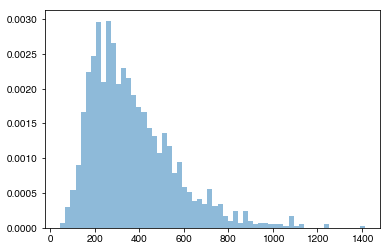

In [27]:
print(extreme_values_100yr_data.shape)
print(extreme_values_100yr_data[300,:])

a = extreme_values_100yr_data[300,:]
a = a[~numpy.isnan(a)]
mp.hist(a, normed=True, bins=60, alpha=0.5)


In [28]:
perc=0.99
scores_at_perc = numpy.zeros((PRECT_nlat*PRECT_nlon))
for latlon_idx in range(len(latlon_indices)):
    fit_values = extreme_values_100yr_data[latlon_idx,:]
    fit_values = fit_values[~numpy.isnan(fit_values)]
    distro_fit = scipy.stats.pearson3.fit(fit_values)
    scores_at_perc[latlon_idx] = scipy.stats.pearson3.ppf(perc, *distro_fit)
scores_at_perc_2d = scores_at_perc.reshape((PRECT_nlat, PRECT_nlon))

/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


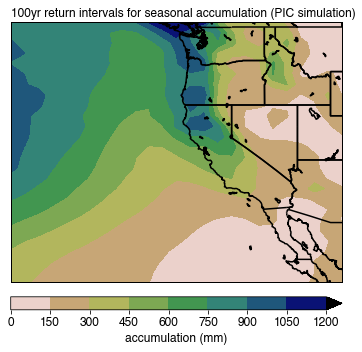

In [29]:
fontsize=12
contour_levels = numpy.arange(0,1201,150)

fig = mp.figure(figsize=(5,5))

ax = fig.add_subplot(111)
map = basemap.Basemap(projection='cyl',ax=ax, llcrnrlat=PRECT_lat.min(),urcrnrlat=PRECT_lat.max(),llcrnrlon=PRECT_lon.min(),urcrnrlon=PRECT_lon.max(),resolution='i')
map.fillcontinents(color='0.75',lake_color='0.5')
map.drawmapboundary(fill_color='0')

map.drawcoastlines(linewidth=1.5, color='0', zorder=3)
map.drawstates(linewidth=1.5, color='0', zorder=3)
map.drawcountries(linewidth=1.5, color='0', zorder=3)

lons,lats = numpy.meshgrid(PRECT_lon, PRECT_lat)
xi,yi = map(lons, lats)

pr_map = map.contourf(xi, yi, scores_at_perc_2d, cmap='gist_earth_r', levels=contour_levels, zorder=2, extend='max', latlon=True)

divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('bottom', size='5%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal')

cbar.set_label('accumulation (mm)', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_ticks(contour_levels)

ax.text(s='100yr return intervals for seasonal accumulation (PIC simulation)', x=0, y=1.01, transform=ax.transAxes, fontsize=fontsize, ha='left', va='bottom')

fig.tight_layout()

mp.savefig('100yr_return_values_seasonal_accumulation_pic.pdf', transparent=True, bbox_inches='tight')

In [30]:
#year_start = 1920
#year_end = 2100

year_start_list = [1920,1950,1980,2010,2040,2070]
year_end_list = [1950,1980,2010,2040,2070,2100]

year_start = year_start_list[5]
year_end = year_end_list[5]

# create season strings
years = numpy.arange(year_start, year_end+1, 1).astype(numpy.int)
half_years_hist_rcp = numpy.arange(year_start+0.75, year_end, 1)

season_strings_hist_rcp = [str(years[i])+'-'+str(years[i+1]) for i in range(years.size-1)]
member_strings_hist_rcp = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_hist_rcp=year_end-year_start

In [31]:
ensemble_members = numpy.hstack((numpy.arange(1,36), numpy.arange(101,106)))
ensemble_names = ['{:03d}'.format(i) for i in ensemble_members]

# Pull out only the year_start to year_end interval

In [34]:
extreme_values_100yr_hist_rcp_list = []
for ensemble_idx in range(len(ensemble_names)):
    extreme_values_100yr = pandas.read_csv('csv_files/extreme_values_seasonal_events_dataframe_model_'+ensemble_names[ensemble_idx]+'_1920-2100.csv')
    extreme_values_100yr_hist_rcp_list.append(extreme_values_100yr[season_strings_hist_rcp].values)
print(extreme_values_100yr_hist_rcp_list[0].shape)

(650, 30)


In [35]:
# collapse all lists into one full list
extreme_values_100yr_hist_rcp_single_array = numpy.empty((extreme_values_100yr_hist_rcp_list[0].shape[0],0))
#print(extreme_values_100yr_hist_rcp_single_array.shape)
for ensemble_idx in range(len(ensemble_names)):
    #print(extreme_values_100yr_hist_rcp_list[0].shape)
    extreme_values_100yr_hist_rcp_single_array = numpy.hstack(( extreme_values_100yr_hist_rcp_single_array, extreme_values_100yr_hist_rcp_list[ensemble_idx] ))

In [41]:
perc=0.99
scores_at_perc_hist_rcp = numpy.zeros((PRECT_nlat*PRECT_nlon))
for latlon_idx in range(len(latlon_indices)):
    fit_values = extreme_values_100yr_hist_rcp_single_array[latlon_idx,:]
    fit_values = fit_values[~numpy.isnan(fit_values)]
    distro_fit = scipy.stats.pearson3.fit(fit_values)
    scores_at_perc_hist_rcp[latlon_idx] = scipy.stats.pearson3.ppf(perc, *distro_fit)
scores_at_perc_hist_rcp_2d = scores_at_perc_hist_rcp.reshape((PRECT_nlat, PRECT_nlon))

/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


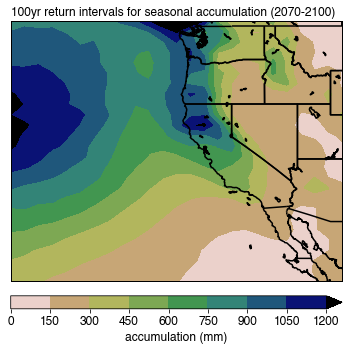

In [42]:
fontsize=12
contour_levels = numpy.arange(0,1201,150)

fig = mp.figure(figsize=(5,5))

ax = fig.add_subplot(111)
map = basemap.Basemap(projection='cyl',ax=ax, llcrnrlat=PRECT_lat.min(),urcrnrlat=PRECT_lat.max(),llcrnrlon=PRECT_lon.min(),urcrnrlon=PRECT_lon.max(),resolution='i')
map.fillcontinents(color='0.75',lake_color='0.5')
map.drawmapboundary(fill_color='0')

map.drawcoastlines(linewidth=1.5, color='0', zorder=3)
map.drawstates(linewidth=1.5, color='0', zorder=3)
map.drawcountries(linewidth=1.5, color='0', zorder=3)

lons,lats = numpy.meshgrid(PRECT_lon, PRECT_lat)
xi,yi = map(lons, lats)

pr_map = map.contourf(xi, yi, scores_at_perc_hist_rcp_2d, cmap='gist_earth_r', levels=contour_levels, zorder=2, extend='max', latlon=True)

divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('bottom', size='5%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal')

cbar.set_label('accumulation (mm)', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_ticks(contour_levels)

ax.text(s='100yr return intervals for seasonal accumulation (2070-2100)', x=0, y=1.01, transform=ax.transAxes, fontsize=fontsize, ha='left', va='bottom')

fig.tight_layout()
mp.savefig('100yr_return_values_seasonal_accumulation_2070-2100.pdf', transparent=True, bbox_inches='tight')

In [39]:
class MidpointNormalize(matplotlib.colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return numpy.ma.masked_array(numpy.interp(value, x, y))

* 200year events are getting larger across the state up to about 25% increase

# Now calculate change in likelihood of a 100yr event

In [48]:
# step 1:  calculate the 99.5th percentile throughout the PIC runs
perc=0.99
scores_at_perc = numpy.zeros((PRECT_nlat*PRECT_nlon))
for latlon_idx in range(len(latlon_indices)):
    fit_values = extreme_values_100yr_data[latlon_idx,:]
    fit_values = fit_values[~numpy.isnan(fit_values)]    
    distro_fit = scipy.stats.pearson3.fit(fit_values)
    scores_at_perc[latlon_idx] = scipy.stats.pearson3.ppf(perc, *distro_fit)

# step 2:  calculate what percentile this value is in the new distributions
perc_of_pic_score = numpy.zeros((PRECT_nlat*PRECT_nlon))
for latlon_idx in range(len(latlon_indices)):
    fit_values = extreme_values_100yr_hist_rcp_single_array[latlon_idx,:]
    fit_values = fit_values[~numpy.isnan(fit_values)]
    distro_fit = scipy.stats.pearson3.fit(fit_values)
    perc_of_pic_score[latlon_idx] = scipy.stats.pearson3.cdf(scores_at_perc[latlon_idx], *distro_fit)

change_likelihood = numpy.zeros((PRECT_nlat*PRECT_nlon))
for latlon_idx in range(len(latlon_indices)):
    change_likelihood[latlon_idx] = (1-perc_of_pic_score[latlon_idx])/(1-perc)
change_likelihood_2d = change_likelihood.reshape((PRECT_nlat,PRECT_nlon))

In [49]:
# make color map
minval=0.0 # 
maxval=0.85 #
n=256
full_cmap = mp.get_cmap('RdBu')
cmap_partial = matplotlib.colors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=full_cmap.name, a=minval, b=maxval), full_cmap(numpy.linspace(minval, maxval, n)))

/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:350

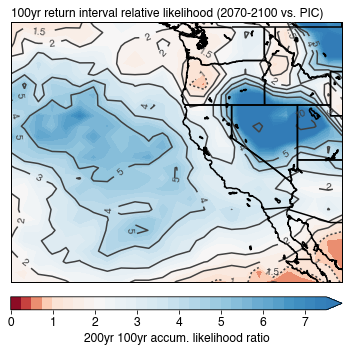

In [50]:
fontsize=12
#contour_levels = [0.,0.25,0.5,0.75,1,1.25,1.5,1.75,2,3,4,5,15,25]#,30,40]#numpy.arange(0,11,1)
contour_levels = numpy.arange(0,7.51,0.25)


fig = mp.figure(figsize=(5,5))

ax = fig.add_subplot(111)
map = basemap.Basemap(projection='cyl',ax=ax, llcrnrlat=PRECT_lat.min(),urcrnrlat=PRECT_lat.max(),llcrnrlon=PRECT_lon.min(),urcrnrlon=PRECT_lon.max(),resolution='i')
map.fillcontinents(color='0.75',lake_color='0.5')
map.drawmapboundary(fill_color='0')

map.drawcoastlines(linewidth=1.5, color='0', zorder=3)
map.drawstates(linewidth=1.5, color='0', zorder=3)
map.drawcountries(linewidth=1.5, color='0', zorder=3)

lons,lats = numpy.meshgrid(PRECT_lon, PRECT_lat)
xi,yi = map(lons, lats)

##MidpointNormalize(midpoint=0.1), \
pr_map = map.contourf(xi, yi, change_likelihood_2d, \
                      #cmap='inferno', \
                      cmap=cmap_partial, \
                      norm=MidpointNormalize(midpoint=1.0), \
                      levels=contour_levels, \
                      zorder=2, \
                      extend='max', \
                      latlon=True)
contour_plot = pr_contour = map.contour(xi, yi, change_likelihood_2d, \
                         levels=[0.5,1.,1.5,2,3,4,5.,10.,15.,20.,25.,30.], \
                         colors='0.25', \
                         linewidth=[0.25]*1+[2]+[0.25]*10, \
                         linestyles=['-']*1+[':']+['-']*10, \
                         )
new_levels = []
for i in contour_plot.levels:
    if i in [0.5,1.5]:
        new_levels.append('{:.1f}'.format(i))
    else:
        new_levels.append('{:.0f}'.format(i))
contour_plot.levels = new_levels
mp.clabel(contour_plot, fontsize=fontsize-2, colors=['0.25']*8+['0.75']*6)

divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('bottom', size='5%', pad=0.2)
cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal')

cbar.set_label('200yr 100yr accum. likelihood ratio', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
#cbar.set_ticks([0,1,2,3,4,5])

ax.text(s='100yr return interval relative likelihood (2070-2100 vs. PIC)', x=0, y=1.01, transform=ax.transAxes, fontsize=fontsize, ha='left', va='bottom')

fig.tight_layout()
fig.savefig('change_in_likelihood_100yr_seasonal_accumulation.pdf', transparent=True, bbox_inches='tight')